# Real Estate Valuation - Taiwan

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. 

## Goal of this notebook: 
The goal of this notebook is to predict the house price of unit area in Tawain (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared).

## Source of dataset 
UCI Machine Learning Repository [click here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## Attribute Information:
The inputs are as follows:

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) 
- X2=the house age (unit: year) 
- X3=the distance to the nearest MRT station (unit: meter) 
- X4=the number of convenience stores in the living circle on foot (integer) 
- X5=the geographic coordinate, latitude. (unit: degree) 
- X6=the geographic coordinate, longitude. (unit: degree) 

The output is as follow:
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 


[Download dataset](https://drive.google.com/file/d/1uUOmUjoOgrJAooZUUzr4kR6zqiV0cmHw/view?usp=sharing()

# 1. Import Dataset



In [1]:
#import package
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/Classroom/Digital Skola/real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
# cek jumlah row dan column
df.shape

(414, 8)

dataset ada 414 baris dan 8 columns

In [ ]:
#drop column no
df.drop('No', inplace=True, axis=1)

#### Profiling Descriptive Stats

In [5]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Harga rumah ini menyebar dari range 7.6 Ping sampai 117.5 Ping dengan rata-rata harga rumah 37.9 Ping. Dataset sebaran harga rumahnya hampir menyebar normal jika kita lihat dari nilai mean yang yang hampir mendekati tapi nilai mediannya.


#### Simplify the colums label for a better processing

In [6]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [7]:
#Hapus comment pada label column supaya lebih simple
df.rename(columns={'X1 transaction date' : 'X1', 'X2 house age':'X2',
       'X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 'X6 longitude':'X6',
       'Y house price of unit area':'Y'}, inplace=True)

In [8]:
df

,No,X1,X2,X3,X4,X5,X6,Y
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# 2. EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

**2.1. Gambarkan keadaan dari harga rumah pada variable (house price of unit area)!**

**a. Gambaran dapat dijelaskan melalui statistik deskriptif dari variable harga rumah tersebut.**

In [10]:
df.describe()

,No,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Key takeaway: Harga rumah ini menyebar dari range 7.6 Ping sampai 117.5 Ping dengan rata-rata harga rumah 37.9 Ping. Dataset sebaran harga rumahnya hampir menyebar normal jika kita lihat dari nilai mean yang yang hampir mendekati tapi nilai mediannya.

**b. Bagaimana sebaran harga rumah tersebut?**

Hint: Dapat dicek menggunakan statistical plot, kemudian apa key take away yang bisa
diambil? Coba uraikan!

In [11]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

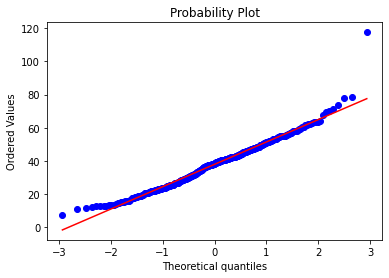

In [12]:
#QQ-Plot
stats.probplot(df['Y'], dist='norm', plot=py)
py.show()


Key takeaway: Berdasarkan QQ-plot dapat diketahui bahwa titik-titik data point mendekati garis diagonal. Hal ini menandakan bahwa data sebaran harga rumah ini menyebar normal. Maka dataset harga rumah ini bisa diprediksi dengan model regresi karena memenuhi salah satu asumsi model regresi, yaitu asumsi normalitas

**c. Apakah ada nilai outlier pada variabel harga rumah? Jika ada, nilai berapa saja?**


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


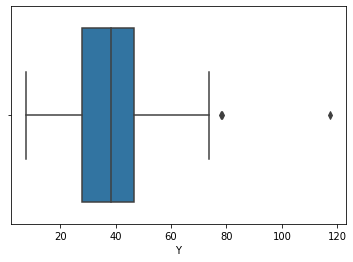

In [13]:
#box-plot
sns.boxplot(df['Y'])

Key takeaway: Ada outliers di atas nilai maksimum data (dilihat dari beberapa titik > garis box max)


In [14]:
#Find Q1 & Q3
q1 = np.percentile(df.Y, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df.Y, 75) #np.quantile(df.Y, 0.75)


In [15]:
# Find the IQR which is the difference between third and first quartile
iqr = q3 - q1


In [16]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr)
upper_bond = q3 + (1.5*iqr)


In [17]:
# Find outliers (cari nilai < lower bond & nilai > upper bond)
df[(df['Y'] < lower_bond) | (df['Y'] > upper_bond)]

,No,X1,X2,X3,X4,X5,X6,Y
220,221,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
270,271,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
312,313,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0


Key takeaway: Nilai outliernya adalah nilai  yang lebih dari  upper_bondnya (78, 78.3, 117.5)

**d. Variabel apa saja yang berkorelasi dengan harga rumah? Bagaimana arah dan seberapa
erat hubungannya?**

**Note : Jika koef korelasi >= 0.5, ada hubungan antar variabel**

**Jika koef korelasi < 0.5, tidak ada hubungan antar variabel**

<ipython-input-18-7620f98261ec>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

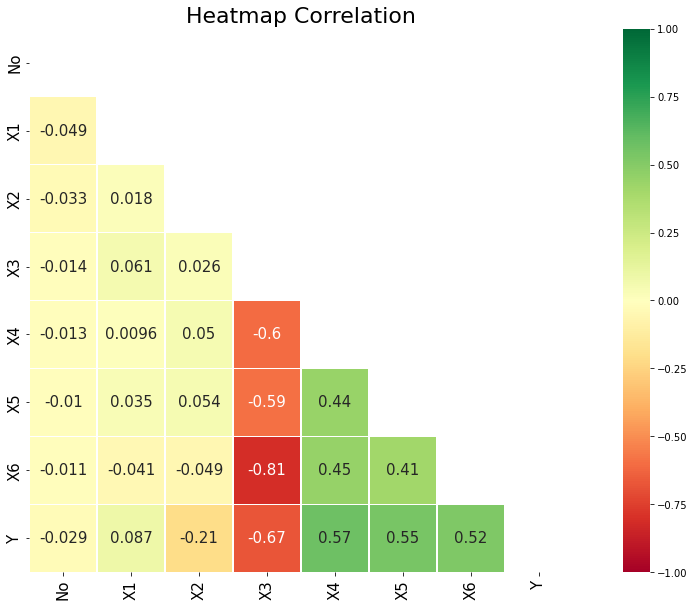

In [18]:
#Heatmap Correlation
import seaborn as sns
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Key takeaway: Berdasarka correlation test, dapat diketahui bahwa ada hubungan variabel X3, X4, X5, X6 dengan Y.

* X3 & Y (koef corr = -0.67 (negative correlation)) artinya jarak MRT di sekitar area rumah berkolerasi dengan besar harga rumah.
*X4, X5, X6 dengan Y (positive correlation)

### X2 vs Y

In [19]:
import matplotlib.pyplot as plt

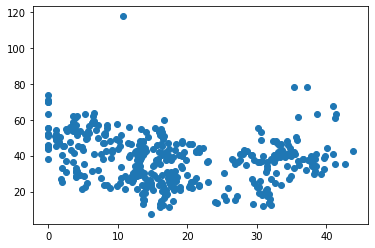

In [20]:
#House Age vs House Price Plot
plt.scatter(df['X2'],df['Y'])

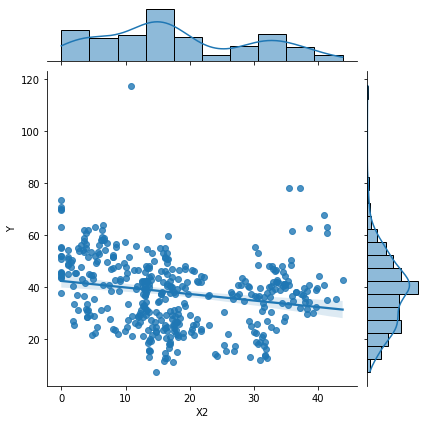

In [21]:
import seaborn as sns
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X2', y='Y', data=df, kind="reg")

Key takeaway: Tidak ada hubungan antara variabel X2 (usia rumah) dengan Y (harga rumah)

### X3 vs Y

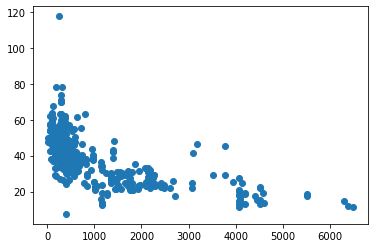

In [22]:
#distance to the nearest MRT station vs House Price Plot
plt.scatter(df['X3'],df['Y'])

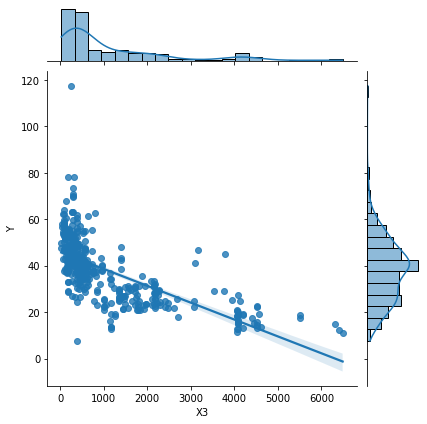

In [23]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X3', y='Y', data=df, kind="reg")

Key takeaway: Ada hubungan negatif antara jarak MRT di sekitar area rumah dengan besarnya harga rumah. Artinya makin dekat jarak MRT dengan rumah makin mahal pula harga rumahnya, dan sebaliknya.

### X4 vs Y

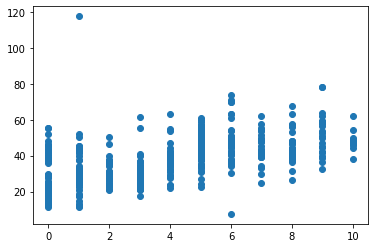

In [24]:
#number of convenience stores vs House Price
plt.scatter(df['X4'],df['Y'])

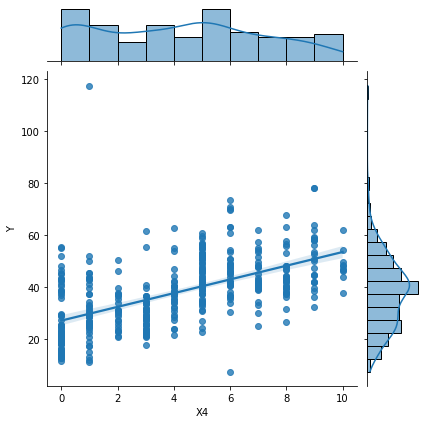

In [25]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X4', y='Y', data=df, kind="reg")

Key takeaway: Ada hubungan positif antara banyaknya toko perbelanjaan di sekitar area rumah dengan besarnya harga rumah. Artinya semakin banyak toko perbelanjaan, makin mahal harga rumahnya, dan sebaliknya.

### X5 vs Y

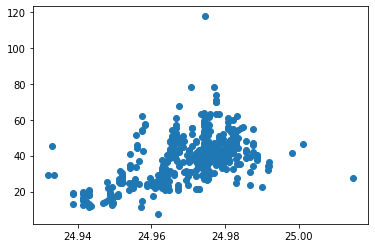

In [26]:
#Latitude vs House Price
plt.scatter(df['X5'],df['Y'])

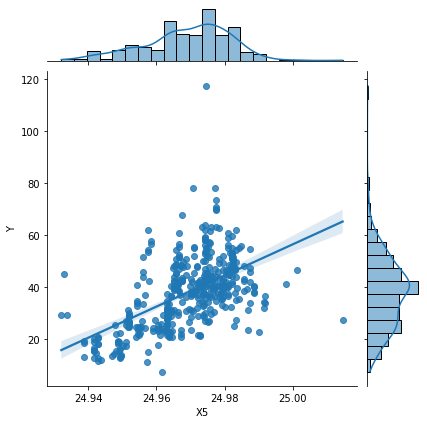

In [27]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X5', y='Y', data=df, kind="reg")

Key takeaway: Ada hubungan positif antara letak garis bujur dengan tingkat harga rumah.

### X6 vs Y

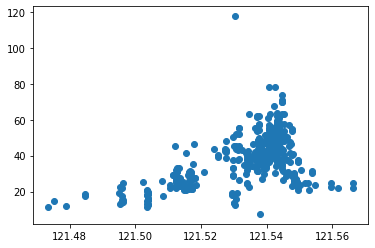

In [28]:
#Longitude vs House Price
plt.scatter(df['X6'], df['Y'])

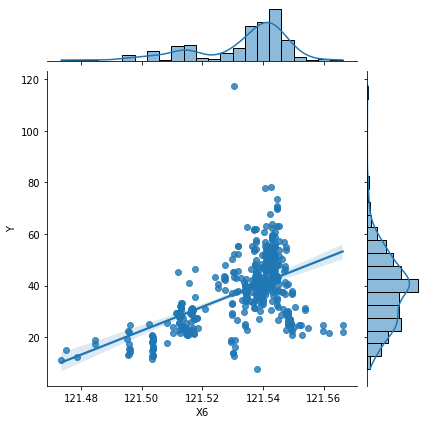

In [29]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X6', y='Y', data=df, kind="reg")

Key takeaway: Ada hubungan positif antara letak garis lintang dengan tingkat harga rumah.

## Feature Engineering & Selection:

###  Checking Multicolinearity

In [30]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix antara variable X')

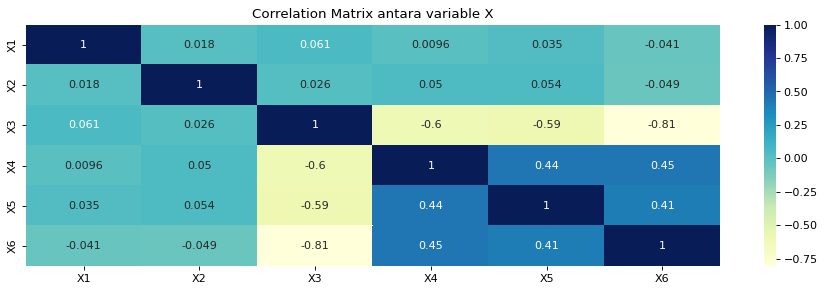

In [31]:
fig, ax = plt.subplots(figsize=(14,4), dpi=80)
sns.heatmap(df.loc[:, 'X1':'X6'].corr(), cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix antara variable X')

Key takeaway: Ada multicolienearity (adanya hubungan diantara sesama variable X) antar variable X3 dengan X4, X4, X5, dan X6(-0.6, -0.59, -0.81)
* X6 dan X3 jika kita mengacu pada nilai koef corr (X3 & Y r=-0.67, dan X6 & Y r=0.52)
* Keputusannya drop X6 karena koef corr < koef corr X3

# 3. Data Preprocessing

### Check null values

In [32]:
df.isna().sum().sort_values(ascending=False)

No    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

Key takeaway: tidak ada missing value

### Data Conversion

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      414 non-null    int64  
 1   X1      414 non-null    float64
 2   X2      414 non-null    float64
 3   X3      414 non-null    float64
 4   X4      414 non-null    int64  
 5   X5      414 non-null    float64
 6   X6      414 non-null    float64
 7   Y       414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


Key takeaway: X1 harusnya tipe data datetime karena merupakan tanggal dimana datasetnya direcord

In [34]:
df["X1"] = pd.to_datetime(df["X1"])
#df.column.astype(float)

In [ ]:
df.dtypes

X1    datetime64[ns]
X2           float64
X3           float64
X4             int64
X5           float64
X6           float64
Y            float64
dtype: object

In [35]:
df.X1

0     1970-01-01 00:00:00.000002012
1     1970-01-01 00:00:00.000002012
2     1970-01-01 00:00:00.000002013
3     1970-01-01 00:00:00.000002013
4     1970-01-01 00:00:00.000002012
                   ...             
409   1970-01-01 00:00:00.000002013
410   1970-01-01 00:00:00.000002012
411   1970-01-01 00:00:00.000002013
412   1970-01-01 00:00:00.000002013
413   1970-01-01 00:00:00.000002013
Name: X1, Length: 414, dtype: datetime64[ns]

### Checking duplicate values

In [36]:
# Check duplicate values
df[df.duplicated(keep=False)]

,No,X1,X2,X3,X4,X5,X6,Y


Key takeaway: tidak ada duplikat data

# 4. Model Prediction

In [60]:
X = df.loc[:, 'X3':'X5']

In [61]:
y = pd.DataFrame(df['Y'])

In [66]:
#membagai dataset menjadi data training dan data testing dengan proporsi 80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [63]:
X

,X3,X4,X5
0,84.87882,10,24.98298
1,306.59470,9,24.98034
2,561.98450,5,24.98746
3,561.98450,5,24.98746
4,390.56840,5,24.97937
...,...,...,...
409,4082.01500,0,24.94155
410,90.45606,9,24.97433
411,390.96960,7,24.97923
412,104.81010,5,24.96674


In [67]:
y

,Y
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [68]:
X_train

,X3,X4,X5
52,1438.5790,3,24.97419
101,170.1289,1,24.97371
389,122.3619,8,24.96756
386,185.4296,0,24.97110
64,995.7554,0,24.96305
...,...,...,...
369,2185.1280,3,24.96322
320,4197.3490,0,24.93885
15,579.2083,2,24.98240
125,193.5845,6,24.96571


### Feature Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [71]:
np.set_printoptions(suppress=True) 
print(X_train[:10])

[[ 0.24854489 -0.36542022  0.40483824]
 [-0.72659658 -1.03000316  0.36623965]
 [-0.76331823  1.29603712 -0.12830486]
 [-0.71483392 -1.36229463  0.15635978]
 [-0.09188289 -1.36229463 -0.49097083]
 [-0.64486128  0.29916271 -1.06351667]
 [-0.63496281  0.29916271  1.03528197]
 [ 0.2204365  -1.36229463  1.32959626]
 [ 0.22382983 -1.36229463  1.33281281]
 [-0.04628614 -1.36229463 -0.56655975]]


In [72]:
print(y_train[:10])

        Y
52   27.0
101  32.9
389  67.7
386  55.3
64   25.3
27   33.6
370  42.1
223  42.3
88   48.0
247  23.1


## Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
ypred_lr=model.predict(X_test)

In [77]:
ypred_lr

array([[10.49549113],
       [39.04959247],
       [49.56137543],
       [46.71171012],
       [43.11945086],
       [10.68161182],
       [37.21089906],
       [49.27721188],
       [46.21196114],
       [27.93225314],
       [28.71832647],
       [33.57453295],
       [43.73498074],
       [43.74040343],
       [ 9.05024458],
       [45.23160709],
       [25.7495769 ],
       [37.21089906],
       [27.24428187],
       [45.15043417],
       [45.23160709],
       [37.88800913],
       [27.14261936],
       [39.26311723],
       [22.02729153],
       [41.23035073],
       [42.62695466],
       [28.82948525],
       [10.27200084],
       [46.55076106],
       [27.19562044],
       [41.06680901],
       [34.90374761],
       [38.86925629],
       [37.88800913],
       [40.84117848],
       [38.86114064],
       [40.26195275],
       [45.23160709],
       [49.27721188],
       [43.13317587],
       [45.28871854],
       [32.26526616],
       [44.47036071],
       [36.06427219],
       [42

In [78]:
ypred_lr = ypred_lr.reshape(-1,1)

In [79]:
# evaluate model
display(model.score(X_test, y_test))

0.525495101513483

In [81]:
from sklearn.metrics import r2_score #koef determinasi (r-square) menunjukkan seberapa besar model mampu menjelaskan keragaman datanya
from sklearn.metrics import mean_squared_error #MSE = selisih nilai aktual - nilai prediction
from sklearn.metrics import mean_absolute_error #abs(aktual - prediction)

#### MSE

In [83]:
mae_lr = mean_squared_error(y_test,ypred_lr).round(2)
mse_lr = mean_absolute_error(y_test,ypred_lr).round(2)
rmse_lr = np.sqrt(mean_squared_error(y_test,ypred_lr)).round(2) #akar MSE


print('MSE : ', mse_lr)
print('MAE : ', mae_lr)
print('RMSE : ', rmse_lr)

MSE :  6.91
MAE :  81.26
RMSE :  9.01


#### R-Square

In [85]:
r2_lr = r2_score(y_test,ypred_lr).round(2)
r2_lr

0.53

Key Takeaway: Model Regresi Linear hanya memiliki akurasi 53% (X3, X4, X5). Artinya 53% mampu menjelaskan keragaman datanya. sisanya 47% dapat dijelaskan oleh variabel di luar model

* Model regresi cukup balik jika R2 >= 75%

## Random Forest Regression

In [88]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model2 = RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)

# evaluate model
display(model2.score(X_test, y_test))

# use model to predict
ypred_rf = model2.predict(X_test)

ypred_rf = ypred_rf.reshape(-1,1)

r2_rf = r2_score(y_test,ypred_rf).round(2)
mse_rf = mean_squared_error(y_test, ypred_rf).round(2)
mae_rf = mean_absolute_error(y_test, ypred_rf).round(2)
rmse_rf = np.sqrt(mean_squared_error(y_test, ypred_rf)). round(2)

print('R2 : ', r2_rf)
print('MSE : ', mse_rf)
print('MAE : ', mae_rf)
print('RMSE : ', rmse_rf)

<ipython-input-88-e96193cf437e>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train, y_train)


0.6298121861032628

R2 :  0.63
MSE :  63.4
MAE :  5.82
RMSE :  7.96


## Support Vector Regression (SVR)

In [89]:
from sklearn.svm import SVR
model3 = SVR(kernel = 'rbf')
model3.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [91]:
# evaluate model
display(model3.score(X_test, y_test))

# use model to predict
ypred_svr = model3.predict(X_test)

ypred_svr = ypred_svr.reshape(-1,1)
r2_svr = r2_score(y_test, ypred_svr).round(2)
mse_svr = mean_squared_error(y_test, ypred_svr).round(2)
mae_svr = mean_absolute_error(y_test,ypred_svr).round(2)
rmse_svr = np.sqrt(mean_squared_error(y_test,ypred_svr)). round(2)

print('R2 : ', r2_svr)
print('MSE : ', mse_svr)
print('MAE : ', mae_svr)
print('RMSE : ', rmse_svr)

0.5464390199669986

R2 :  0.55
MSE :  77.67
MAE :  6.46
RMSE :  8.81


In [94]:
#buat dataframe untuk compare beberapa model yang telah dibangun

data = np.array([['', 'R2', 'MSE', 'MAE', 'RMSE'],
                ['Linear Regression', r2_lr, mse_lr, mae_lr, rmse_lr],
                ['RF', r2_rf, mse_rf, mae_rf, rmse_rf],
                ['SVR', r2_svr, mse_svr, mae_svr, rmse_svr]])

In [95]:
data

array([['', 'R2', 'MSE', 'MAE', 'RMSE'],
       ['Linear Regression', '0.53', '6.91', '81.26', '9.01'],
       ['RF', '0.63', '63.4', '5.82', '7.96'],
       ['SVR', '0.55', '77.67', '6.46', '8.81']], dtype='<U32')

In [96]:
table = pd.DataFrame(data = data[1:, 1:],
                    index = data[1:, 0],
                    columns = data [0, 1:])

In [97]:
table

,R2,MSE,MAE,RMSE
Linear Regression,0.53,6.91,81.26,9.01
RF,0.63,63.4,5.82,7.96
SVR,0.55,77.67,6.46,8.81


## Model Comparison

# 5. Conclusion

Model regresi yang terbaik adalah model Random Forest Regressor karena memiliki akurasi model yang paling tinggi dan error model yang terkecil dibandingkan dengan model lainnya. (R2=63%)

In [98]:
#buat prediksi
#jika diketahui ada X3, X4, X5 masing2 85, 10, 25

model2.predict([[95,10,25]])

array([29.20186496])